In [1]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

input_file_1 = '/home/snu/Stomics/output/04.tissuecut/B02822A1.high_res.gef'
input_file_2 = '/home/snu/Stomics/output/04.tissuecut/B02822A1.old.high_res.gef'

data1 = st.io.read_gef(input_file_1)
data2 = st.io.read_gef(input_file_2)



[2024-06-11 14:46:11][Stereo][215412][MainThread][124890142652224][reader][1070][INFO]: read_gef begin ...
[2024-06-11 14:46:13][Stereo][215412][MainThread][124890142652224][reader][1241][INFO]: the matrix has 3970 cells, and 30843 genes.
[2024-06-11 14:46:13][Stereo][215412][MainThread][124890142652224][reader][1242][INFO]: read_gef end.
[2024-06-11 14:46:13][Stereo][215412][MainThread][124890142652224][reader][1070][INFO]: read_gef begin ...
[2024-06-11 14:46:15][Stereo][215412][MainThread][124890142652224][reader][1241][INFO]: the matrix has 2994 cells, and 30288 genes.
[2024-06-11 14:46:15][Stereo][215412][MainThread][124890142652224][reader][1242][INFO]: read_gef end.


In [2]:
data1.tl.cal_qc()
data2.tl.cal_qc()


[2024-06-11 14:46:15][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run cal_qc...
[2024-06-11 14:46:15][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: cal_qc end, consume time 0.0947s.
[2024-06-11 14:46:15][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run cal_qc...
[2024-06-11 14:46:15][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: cal_qc end, consume time 0.0759s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

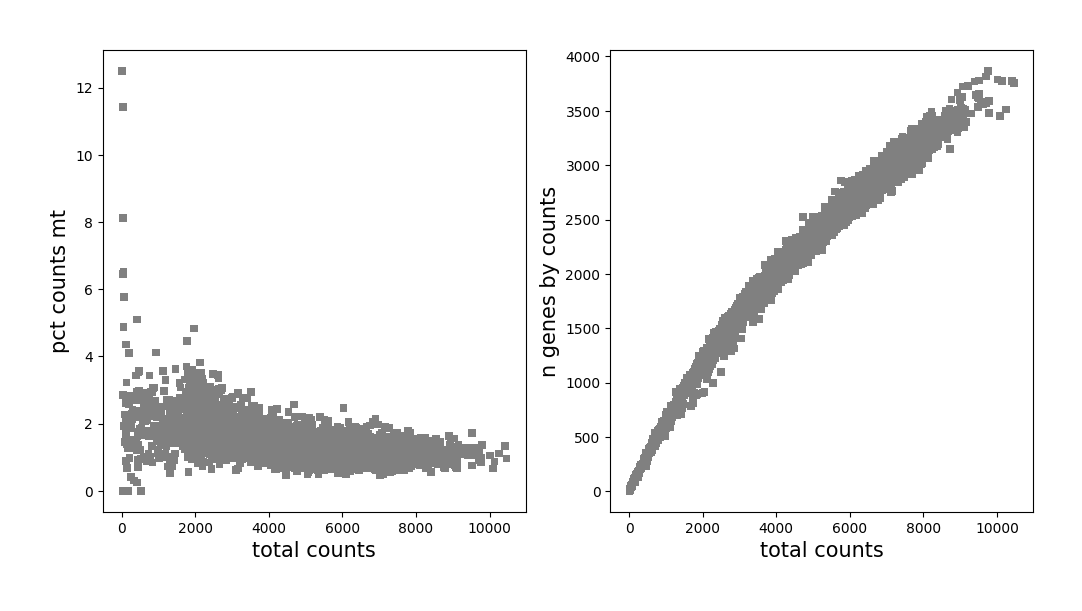

In [3]:
data1.plt.genes_count()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

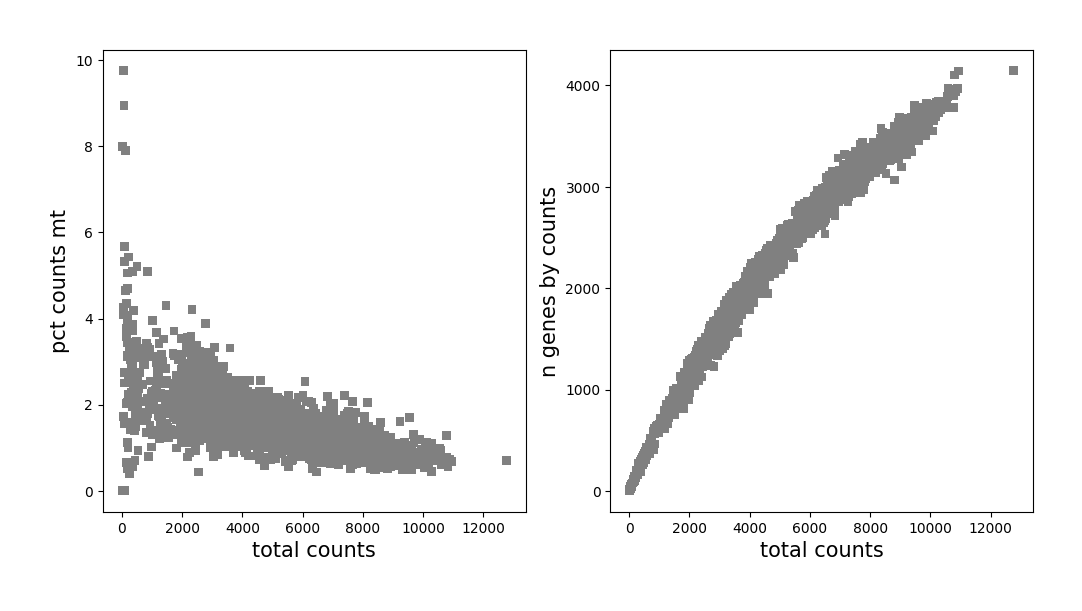

In [4]:

data2.plt.genes_count()


In [5]:
data1.tl.filter_cells(max_n_genes_by_counts=4000, pct_counts_mt=5, inplace=True)
data2.tl.filter_cells(max_n_genes_by_counts=4500, pct_counts_mt=7, inplace=True)


[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run filter_cells...
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0699s.
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run filter_cells...
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: filter_cells end, consume time 0.0617s.


StereoExpData object with n_cells X n_genes = 2990 X 30288
bin_type: bins
bin_size: 100
offset_x = 0
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

In [6]:
data = st.utils.data_helper.merge(data1, data2)

# check the shape of merged data
data.shape

(6953, 27516)

In [7]:
data.tl.normalize_total()
data.tl.log1p()


[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run normalize_total...
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: normalize_total end, consume time 0.0772s.
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run log1p...
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: log1p end, consume time 0.0449s.


In [8]:
data.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')

[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run pca...
[2024-06-11 14:46:16][Stereo][215412][MainThread][124890142652224][dim_reduce][78][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2024-06-11 14:46:36][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: pca end, consume time 19.7538s.


In [9]:
data.tl.batches_integrate(pca_res_key='pca', res_key='pca_integrated')

[2024-06-11 14:46:36][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run batches_integrate...
2024-06-11 14:46:37,164 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-06-11 14:46:38,210 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-06-11 14:46:39,340 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-06-11 14:46:40,480 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-06-11 14:46:41,623 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-06-11 14:46:42,761 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2024-06-11 14:46:43,901 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2024-06-11 14:46:45,042 - harmonypy - INFO - Converged after 7 iterations
INFO:harmonypy:Converged after 7 iterations
[2024-06-11 14:46:45][Stereo][215412][MainThread][124890142652224][st_pipeline][44][I

In [14]:
data.tl.neighbors(pca_res_key='pca_integrated', n_pcs=50, res_key='neighbors_integrated')
data.tl.umap(pca_res_key='pca_integrated', neighbors_res_key='neighbors_integrated', res_key='umap_integrated')
data.plt.batches_umap(res_key='umap_integrated')   


[2024-06-11 14:47:06][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run neighbors...
[2024-06-11 14:47:06][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: neighbors end, consume time 0.8325s.
[2024-06-11 14:47:06][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


[2024-06-11 14:47:14][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: umap end, consume time 7.3143s.


Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Bokeh(Figure)
        [1] Column
            [0] Row
                [0] Bokeh(Figure)
                [1] Bokeh(Figure)

[2024-06-11 14:46:54][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run leiden...
[2024-06-11 14:46:55][Stereo][215412][MainThread][124890142652224][pipeline_utils][27][INFO]: Can not find raw data, the data which may have been normalized will be used.
[2024-06-11 14:46:55][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: leiden end, consume time 0.3993s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

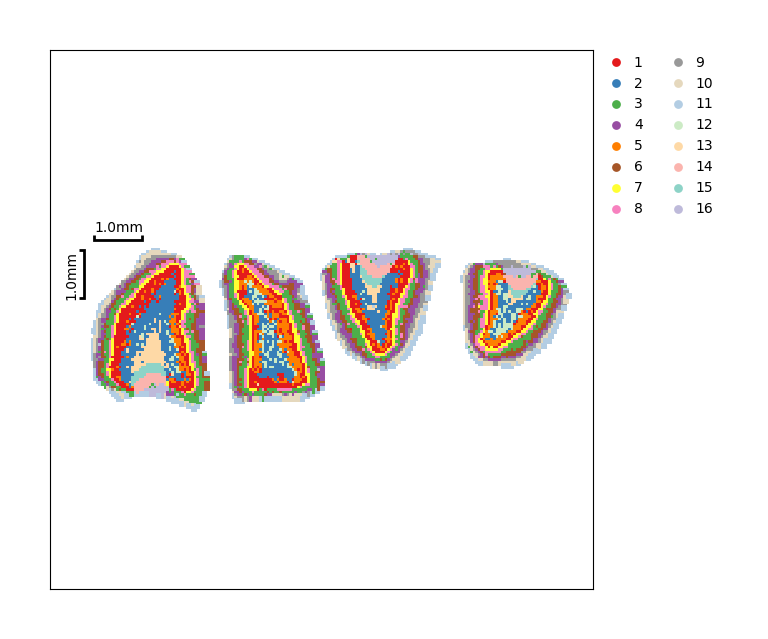

In [11]:
data.tl.leiden(neighbors_res_key='neighbors_integrated', res_key='leiden')
data.plt.cluster_scatter(res_key='leiden')



In [12]:
data.tl.neighbors(pca_res_key='pca', n_pcs=50, res_key='neighbors', n_jobs=-1)
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')
data.plt.batches_umap(res_key='umap')

[2024-06-11 14:46:55][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run neighbors...
[2024-06-11 14:46:56][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: neighbors end, consume time 0.8212s.
[2024-06-11 14:46:56][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


[2024-06-11 14:47:03][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: umap end, consume time 6.7207s.


Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Bokeh(Figure)
        [1] Column
            [0] Row
                [0] Bokeh(Figure)
                [1] Bokeh(Figure)

In [13]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')



[2024-06-11 14:47:03][Stereo][215412][MainThread][124890142652224][st_pipeline][41][INFO]: start to run leiden...
[2024-06-11 14:47:03][Stereo][215412][MainThread][124890142652224][pipeline_utils][27][INFO]: Can not find raw data, the data which may have been normalized will be used.
[2024-06-11 14:47:03][Stereo][215412][MainThread][124890142652224][st_pipeline][44][INFO]: leiden end, consume time 0.3266s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

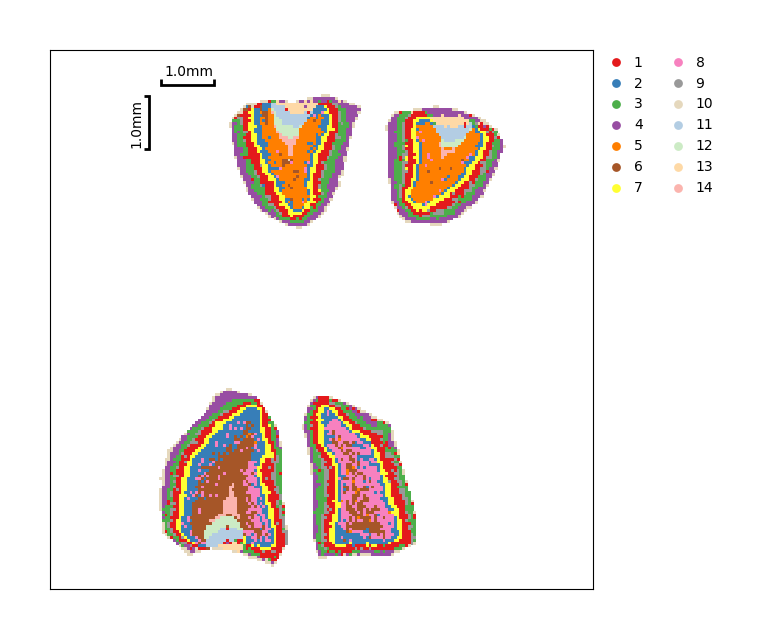

In [43]:
data.plt.cluster_scatter(res_key='leiden', colors='stereo_30', dot_size=5)

In [34]:
from matplotlib import colormaps

In [35]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [56]:
import sys
import os
from natsort import natsorted
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator

import warnings
warnings.filterwarnings('ignore')




In [58]:
data = st.utils.data_helper.merge(data1, data2)
ms_data = data

StereoExpData object with n_cells X n_genes = 6953 X 27516
bin_type: bins
bin_size: 100
offset_x = 0
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'batch']
genes: ['gene_name']
result: []